In [1]:
from scapy.all import*
from math import*
import os
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
def find_the_way(path,file_format):
    files_add = []
    # r=root, d=directories, f = files
    for r, d, f in os.walk(path):
        for file in f:
            if file_format in file:
                files_add.append(os.path.join(r, file))  
    return files_add
files_add=find_the_way('./pcap/','.pcap')

In [3]:
def pad(ls,size):
    for i in range(0,size-len(ls)):
        ls.append(0)
    return ls

In [17]:
def ip_parse(ip):
    ip_int=[]
    if ":" in ip:
        ip=ip.replace(":","")
        for i in ip:
            ip_int.append(int(i,16))
    else:
        ip=list(ip.split("."))
        for i in ip:
            ip_int.append(int(i))

        
    return ip_int

def port_parse(port):
    temp=hex(port).split('x')[-1]
    port_list=[]
    for i in temp:
        port_list.append(int(i,16))
    while len(port_list)<4:
        port_list.insert(0,0)
    return port_list
    



=====================Aria\Setup-A-1-STA.pcap=====================



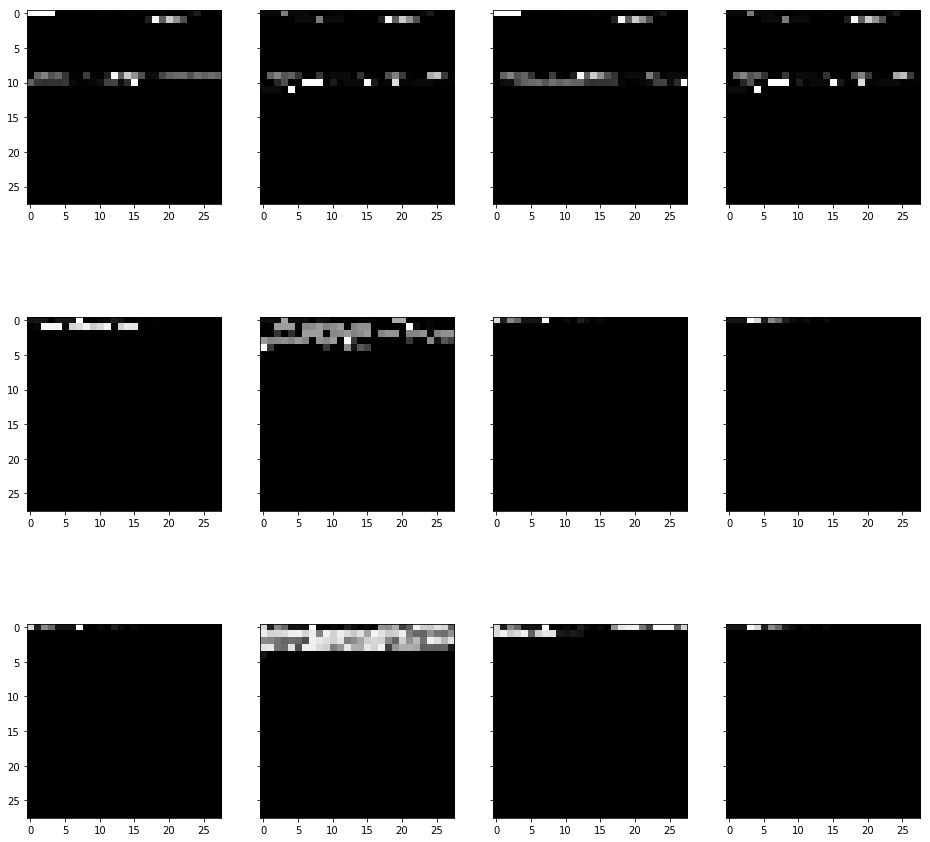



=====================D-LinkCam\Setup-A-1-STA.pcap=====================



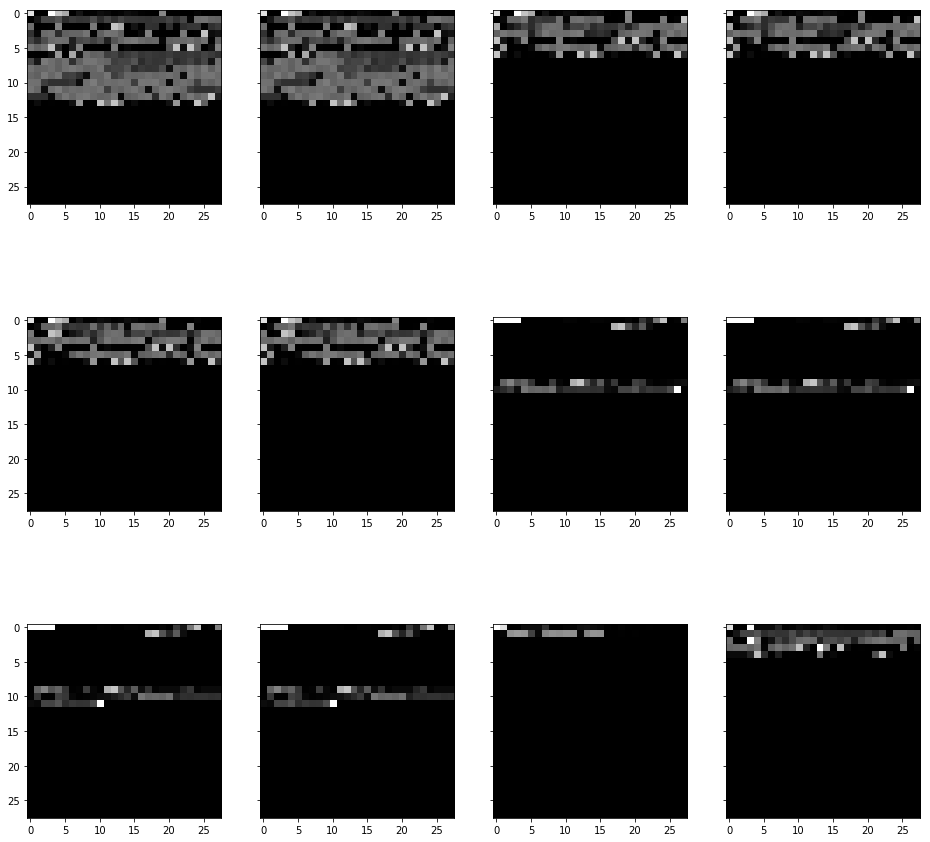



=====================D-LinkDayCam\Setup-A-1-STA.pcap=====================



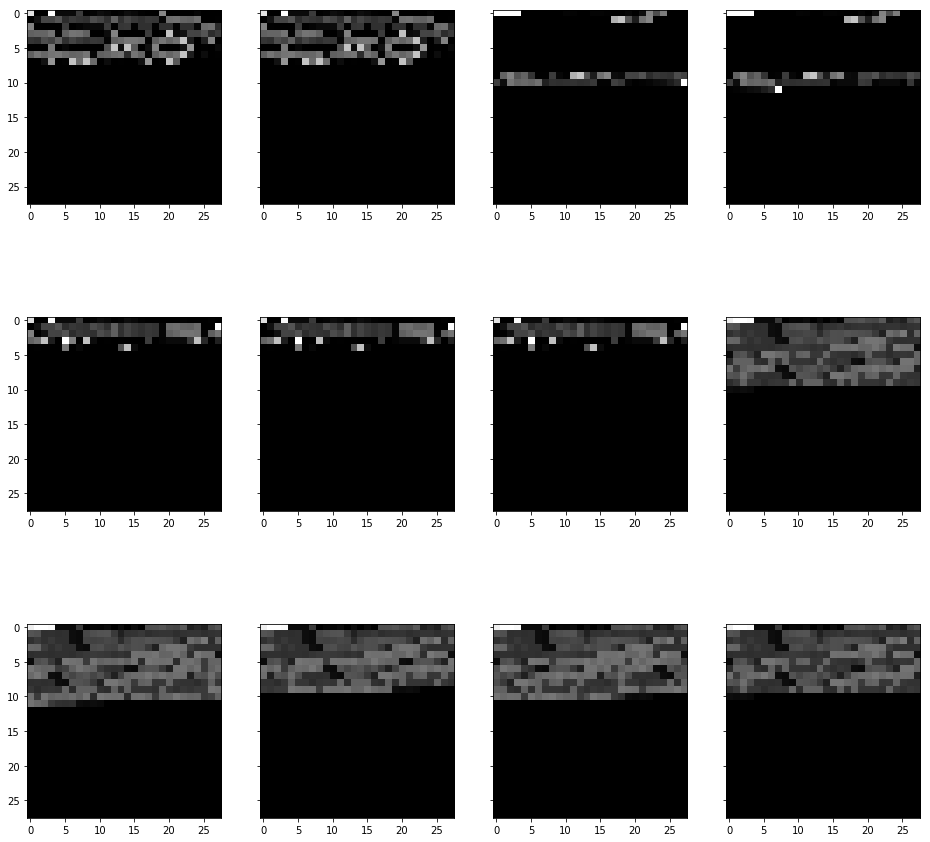



=====================D-LinkDoorSensor\Setup-C-1-STA.pcap=====================



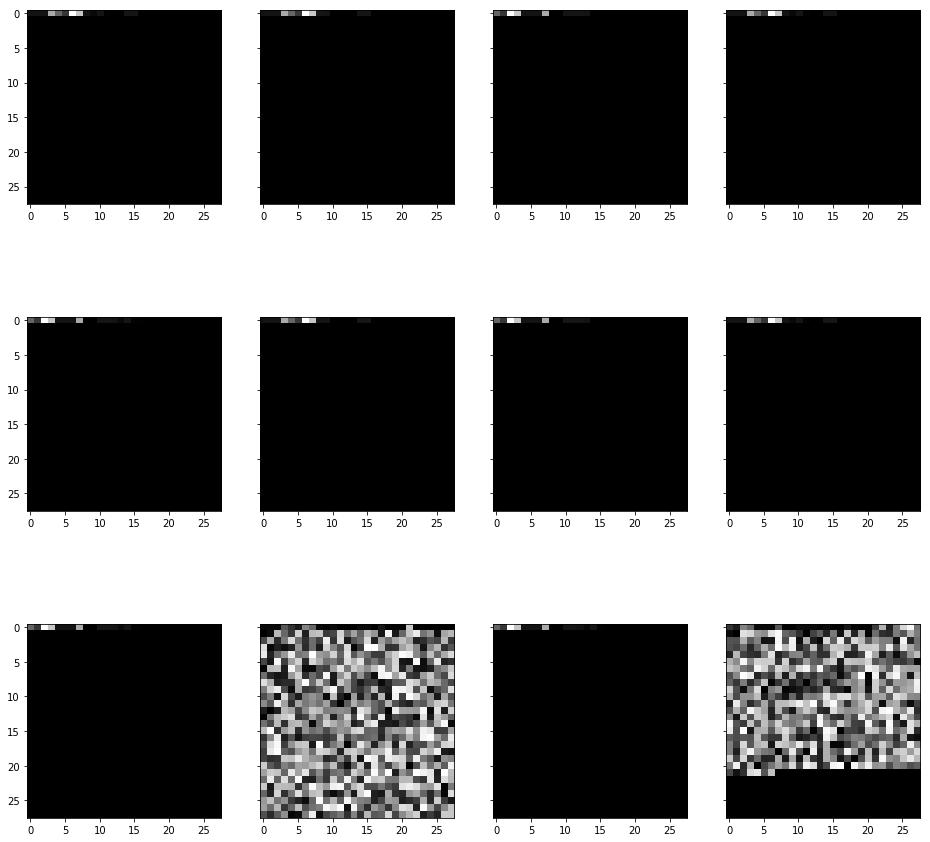



=====================D-LinkHomeHub\Setup-A-1-STA.pcap=====================



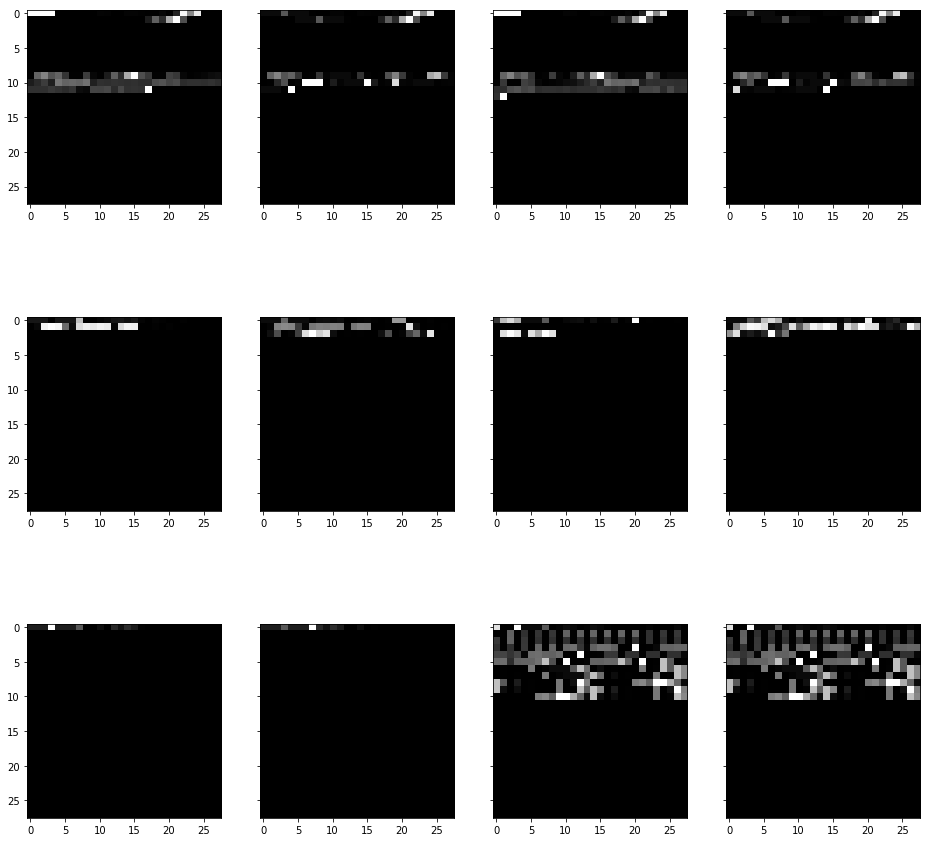



=====================D-LinkSensor\Setup-A-1-STA.pcap=====================



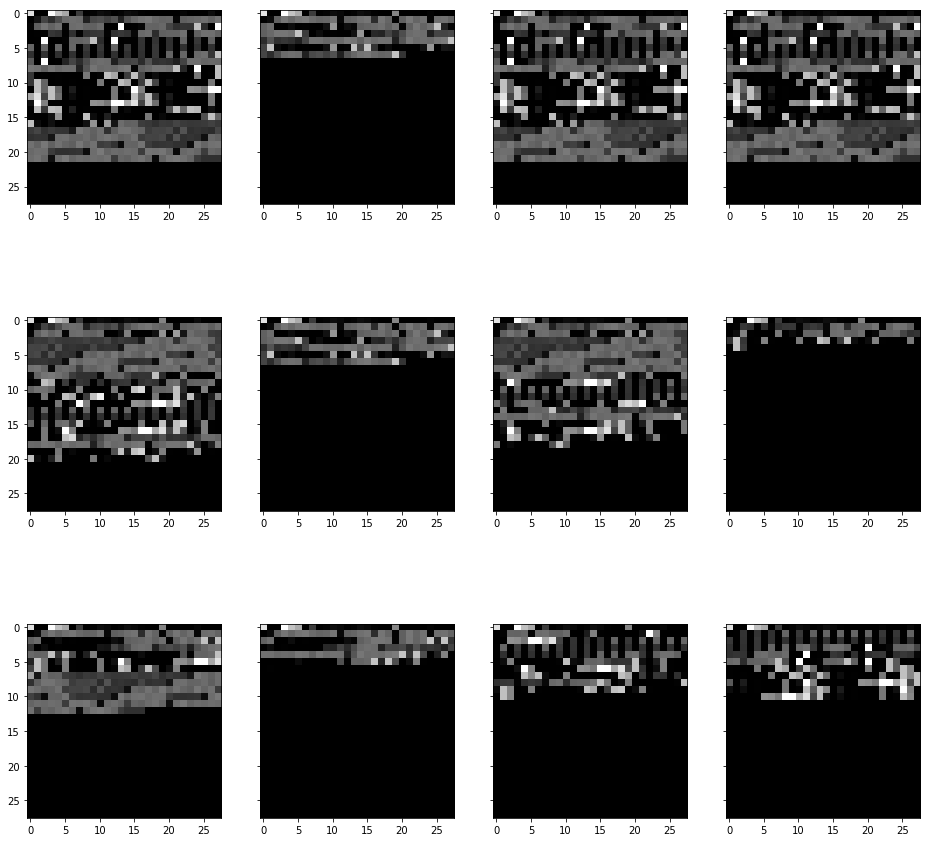



=====================D-LinkSiren\Setup-A-1-STA.pcap=====================



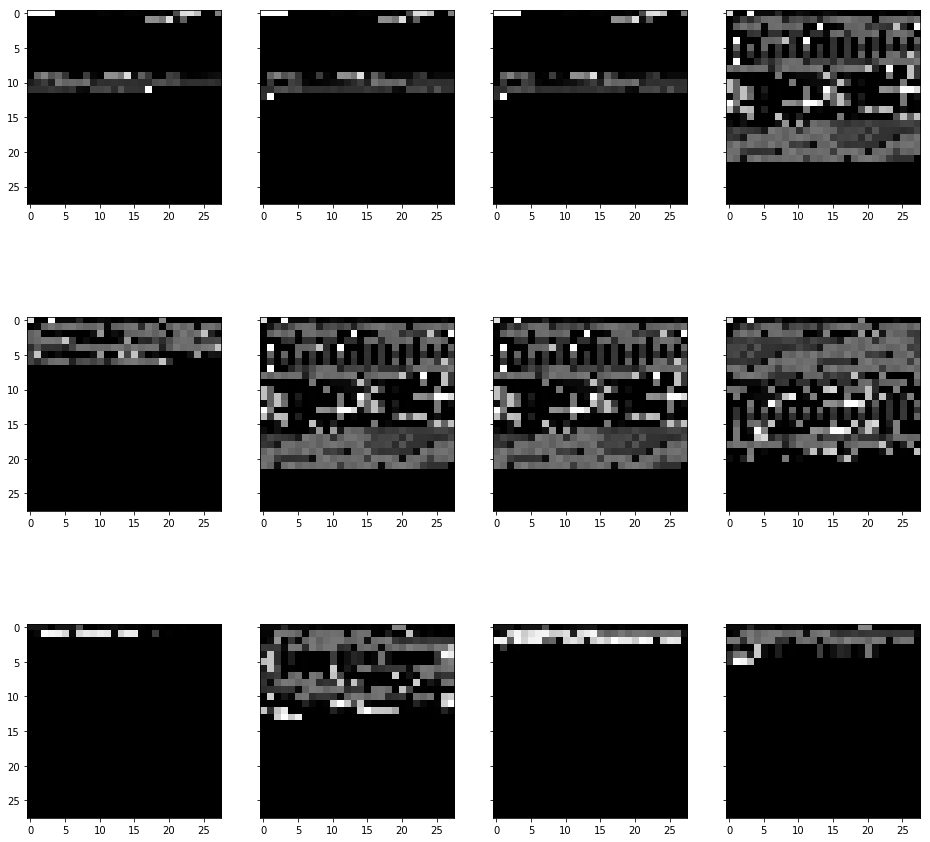



=====================D-LinkSwitch\Setup-A-1-STA.pcap=====================



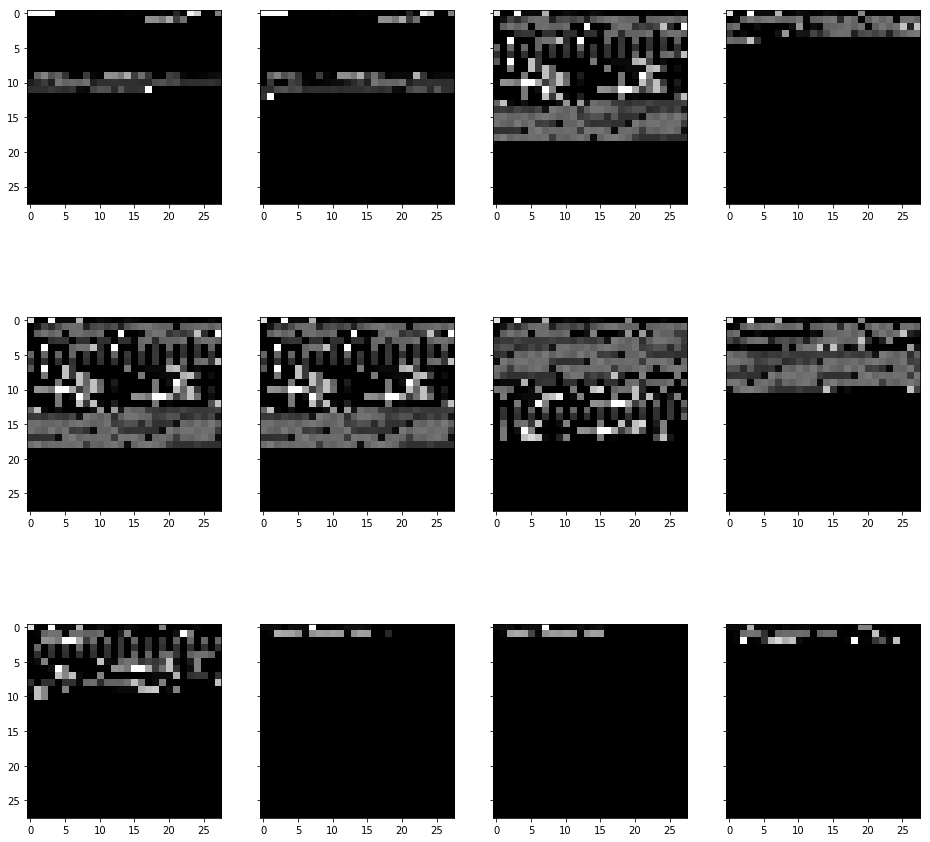



=====================D-LinkWaterSensor\Setup-A-1-STA.pcap=====================



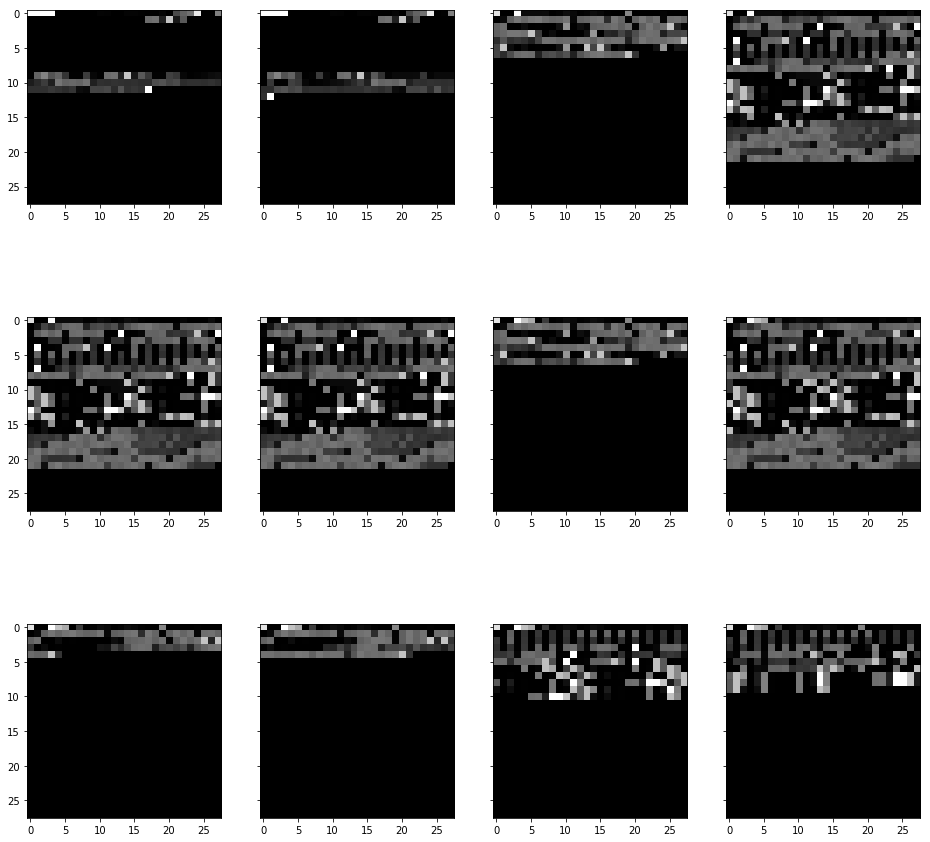



=====================EdimaxCam\Setup-A-1-STA.pcap=====================



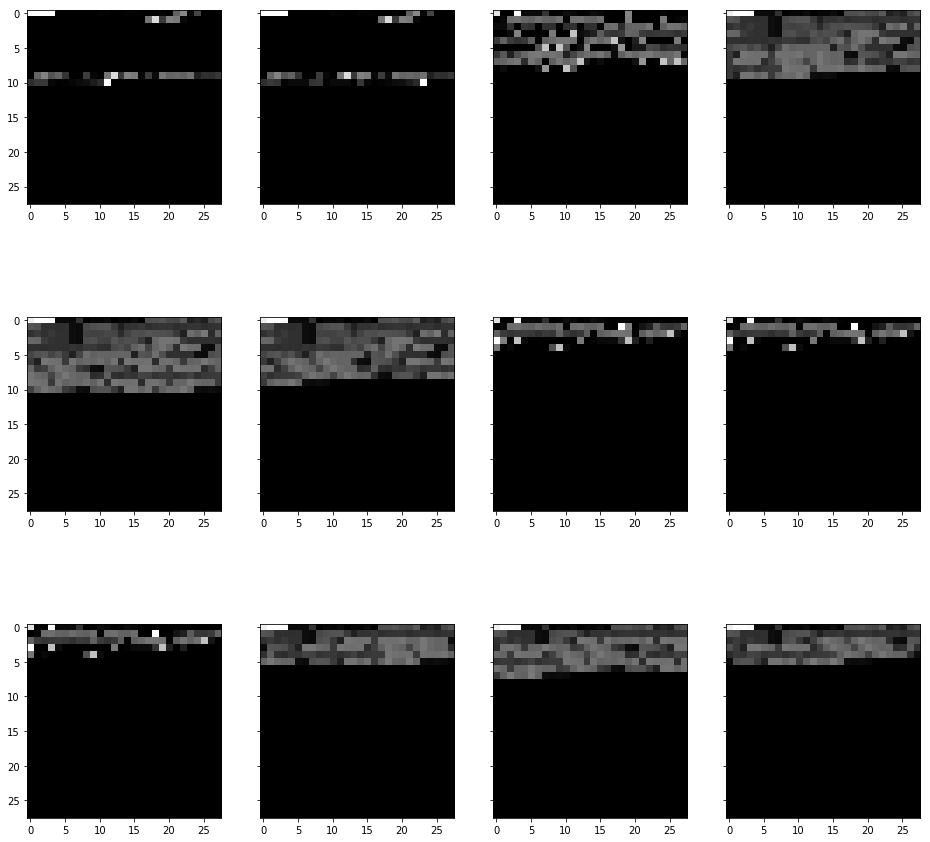



=====================EdimaxPlug1101W\Setup-A-1-STA.pcap=====================



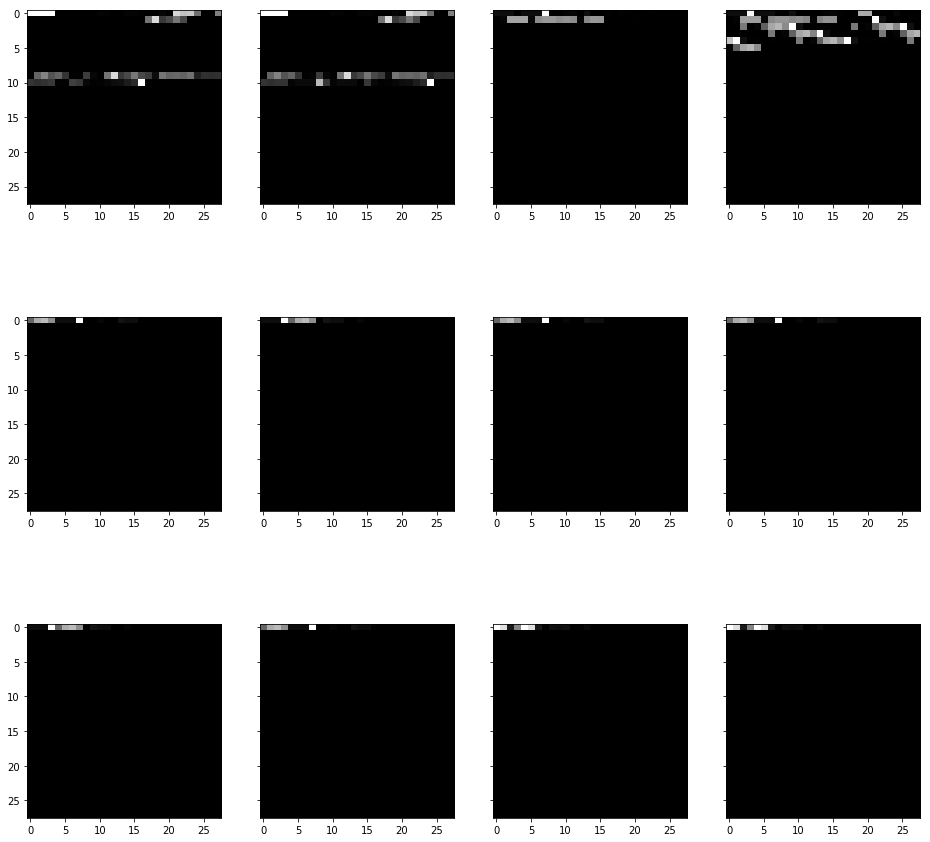



=====================EdimaxPlug2101W\Setup-A-1-STA.pcap=====================



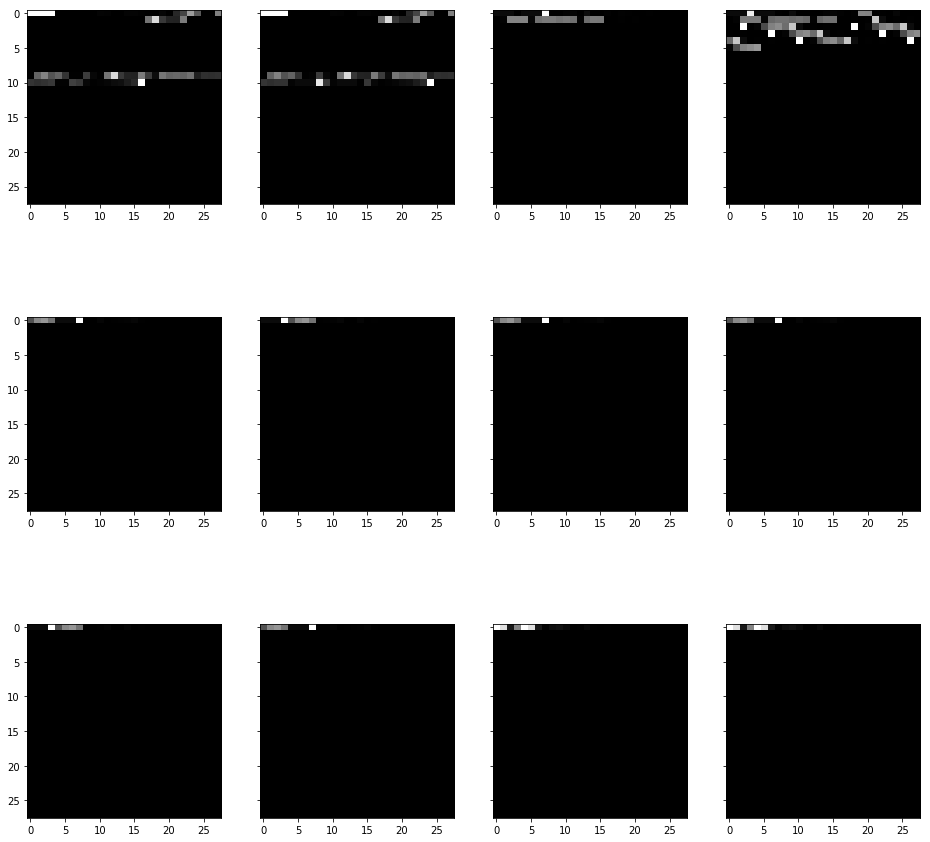



=====================EdnetCam\Setup-A-1-STA.pcap=====================



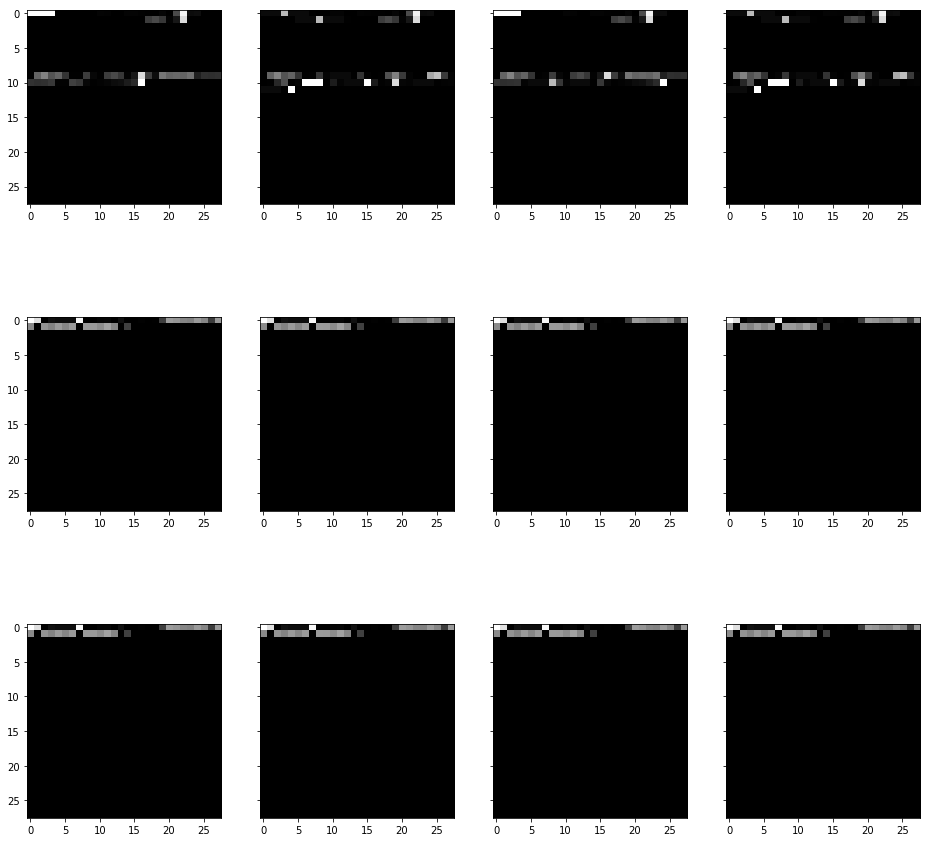



=====================EdnetGateway\Setup-A-1-STA.pcap=====================



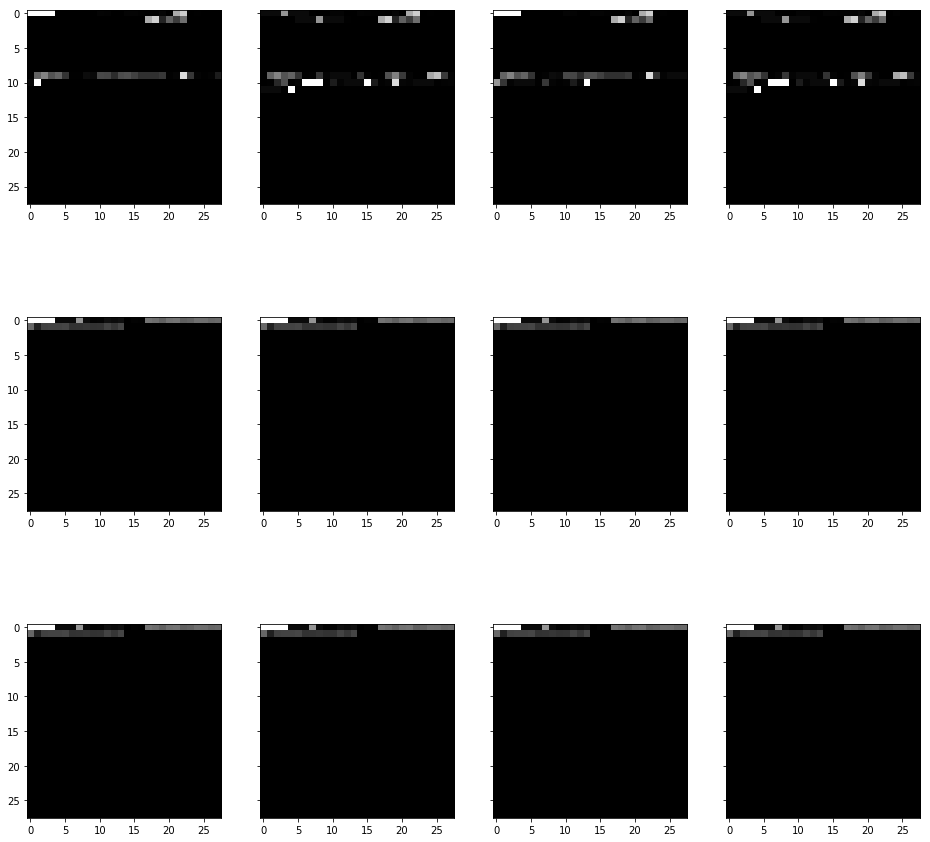



=====================HomeMaticPlug\Setup-C-1-STA.pcap=====================



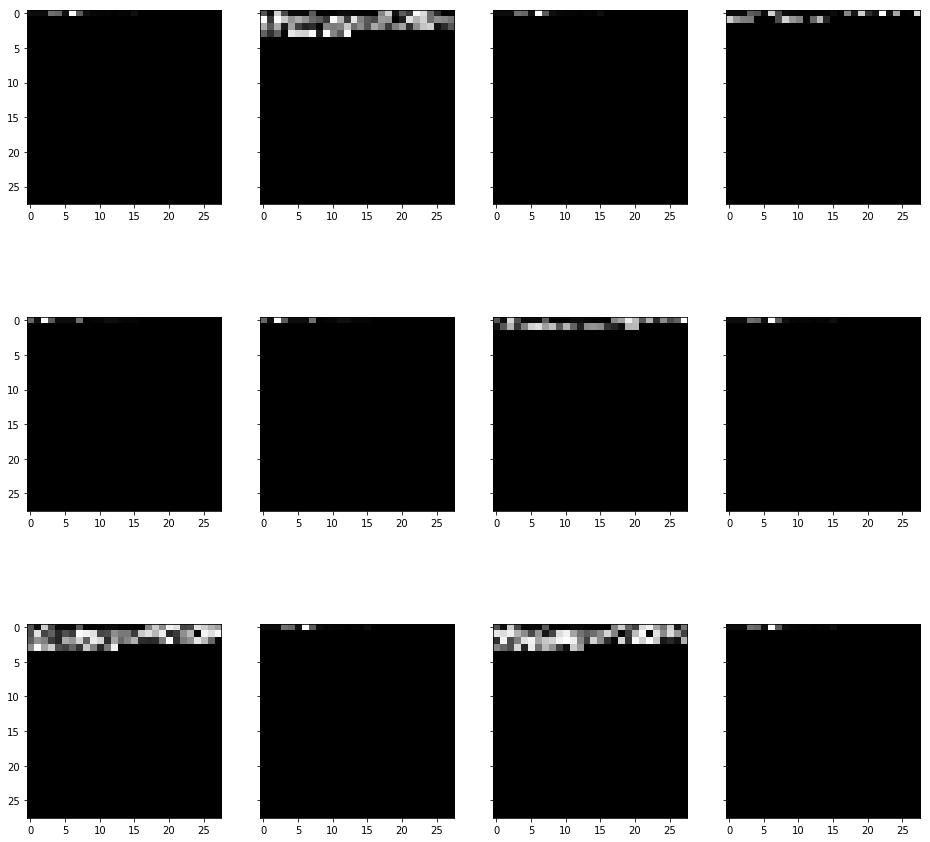



=====================HueBridge\Setup-A-1-STA.pcap=====================



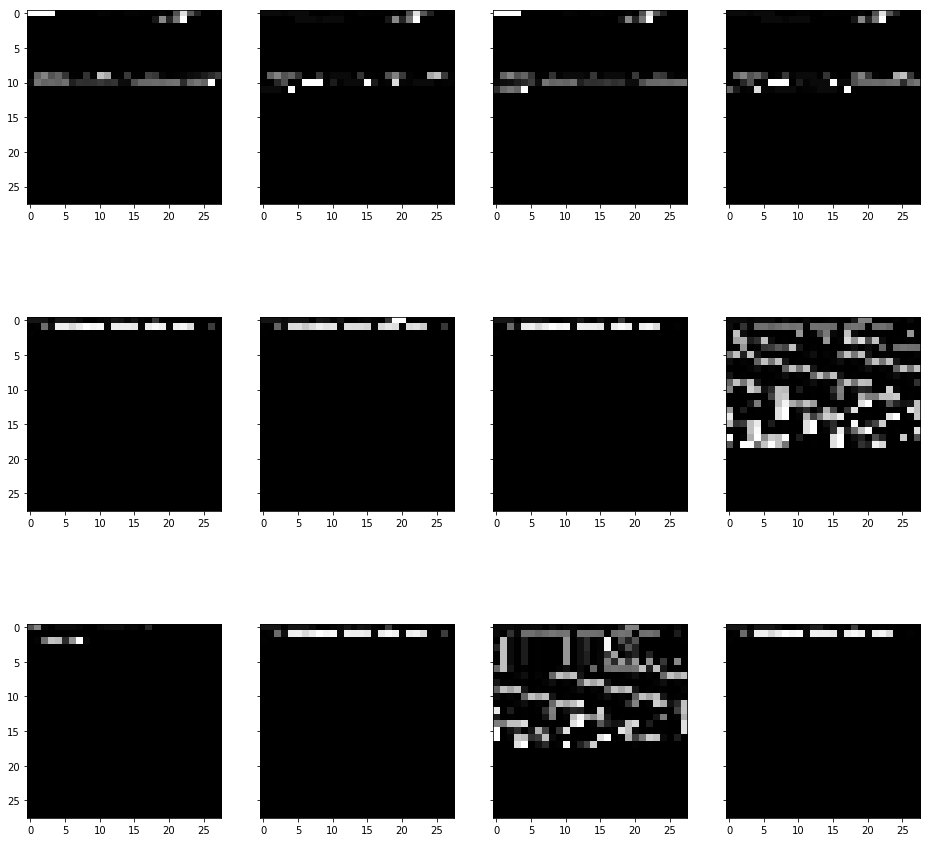



=====================HueSwitch\Setup-A-1-STA.pcap=====================



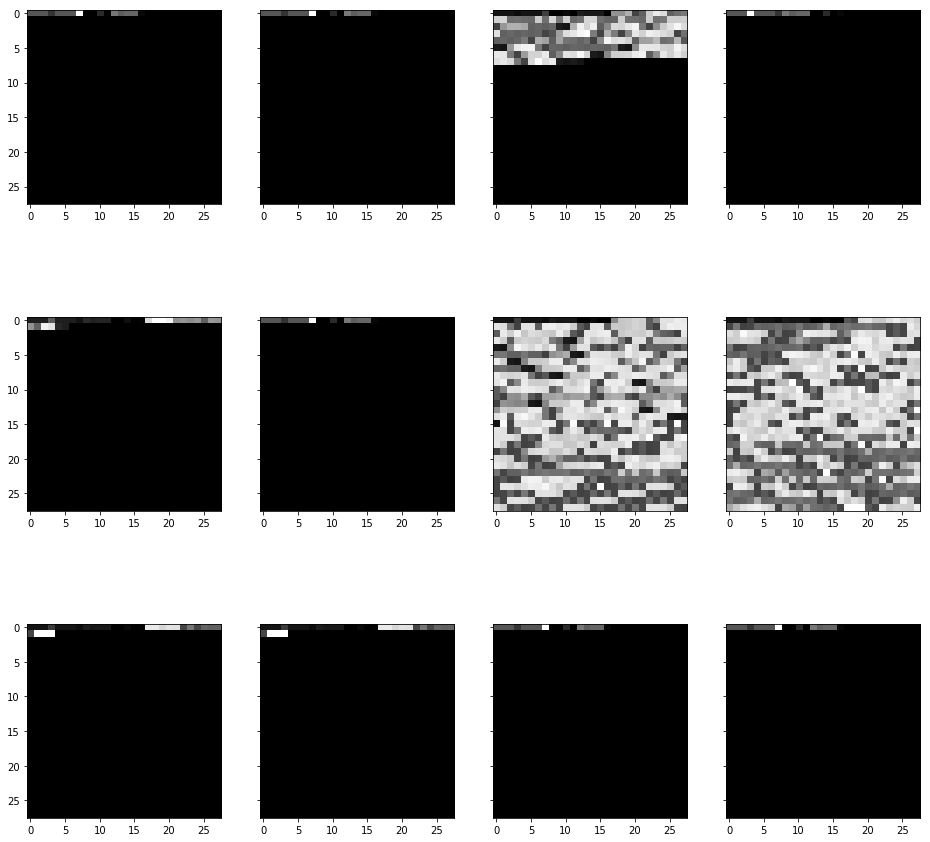



=====================iKettle2\Setup-A-1-STA.pcap=====================



=====================Lightify\Setup-C-1-STA.pcap=====================



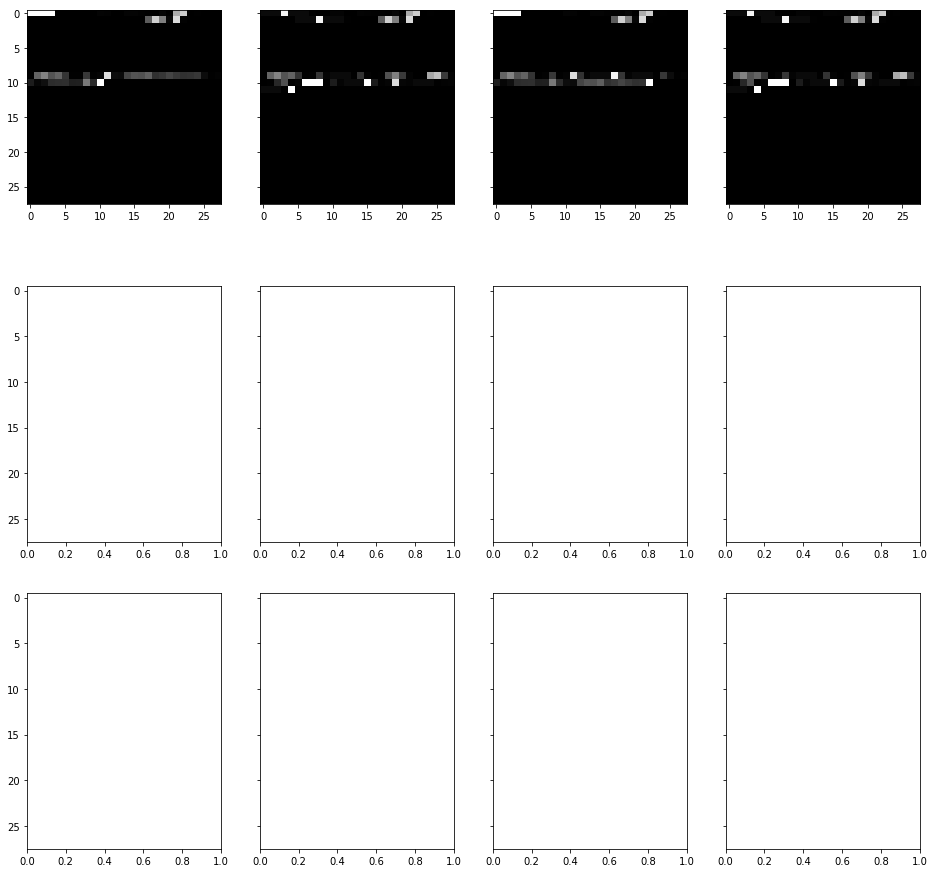

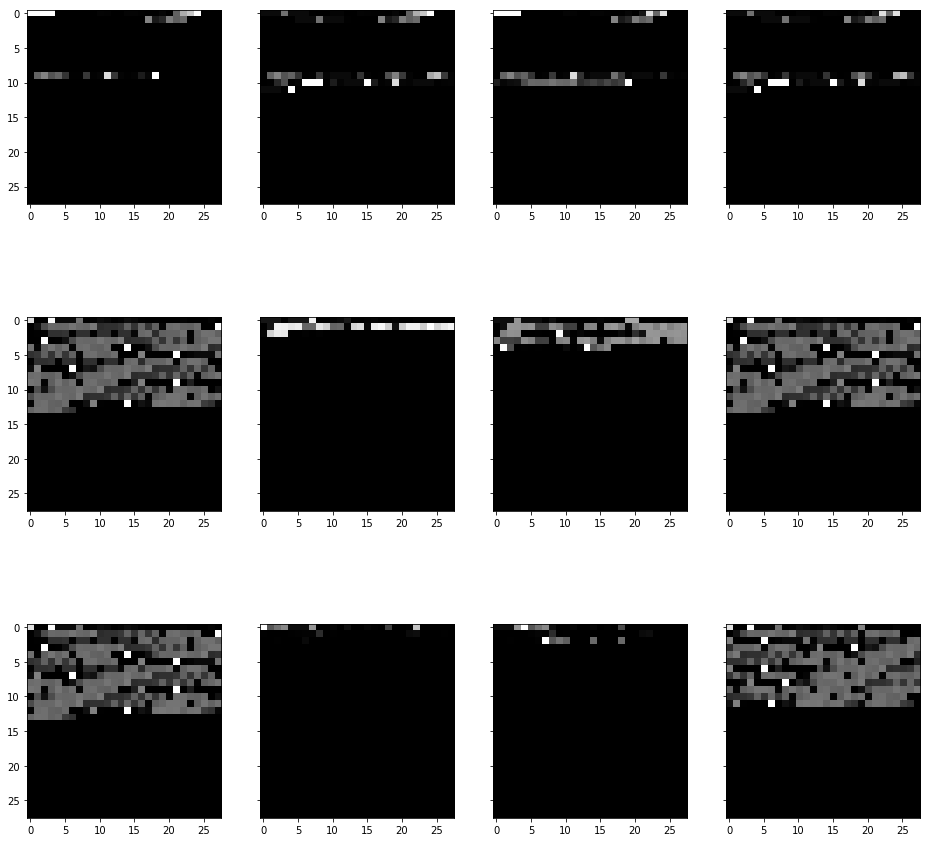



=====================MAXGateway\Setup-A-1-STA.pcap=====================



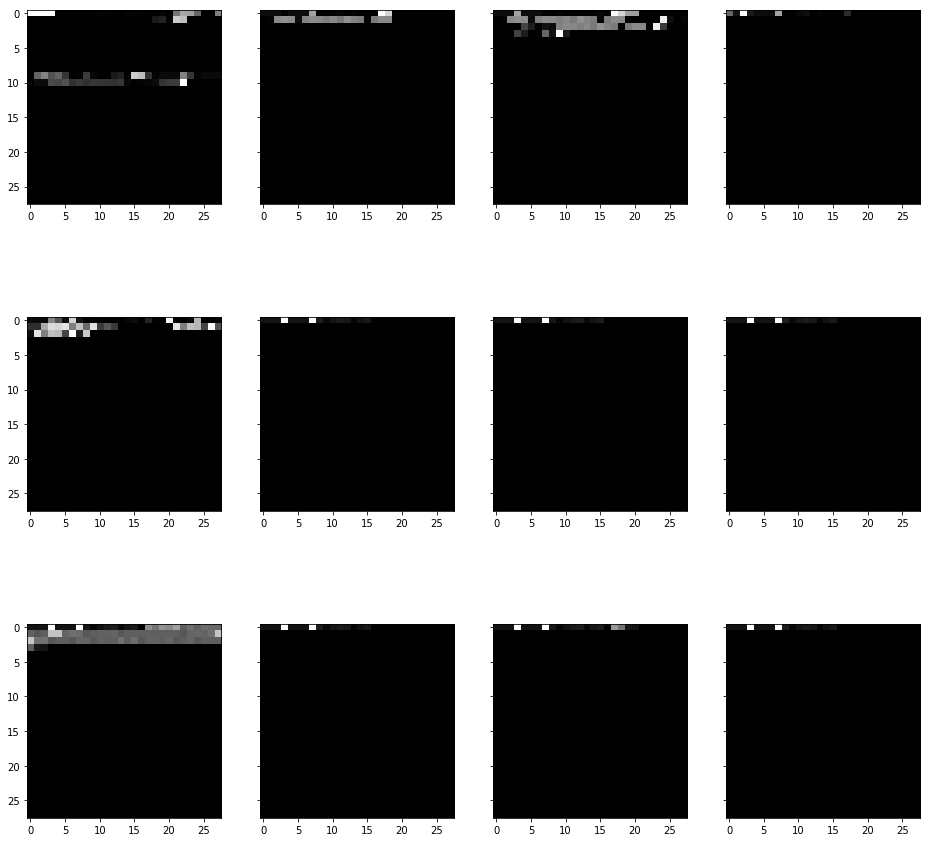



=====================SmarterCoffee\Setup-A-1-STA.pcap=====================



=====================TP-LinkPlugHS100\Setup-A-1-STA.pcap=====================



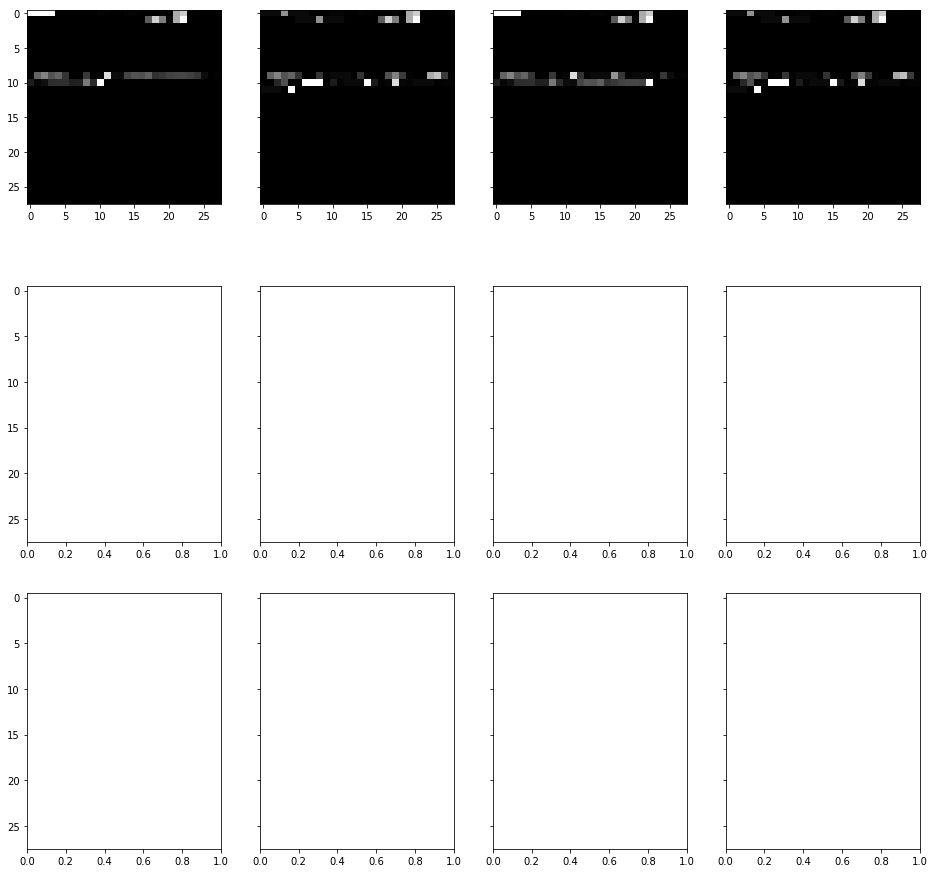

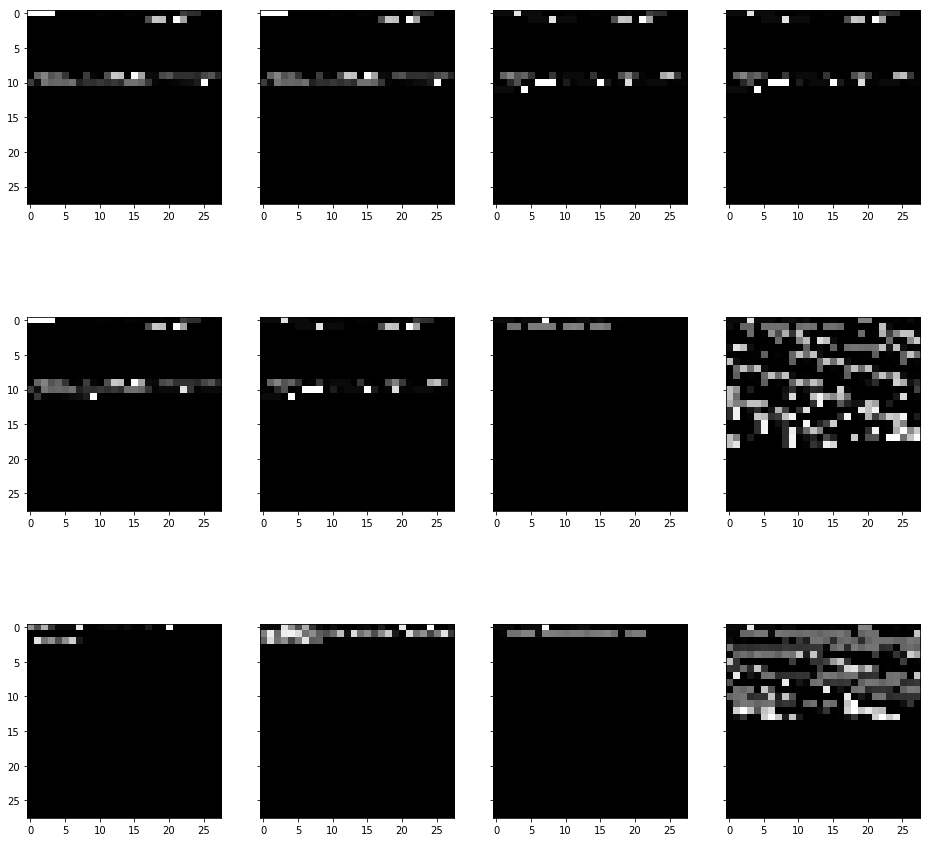



=====================TP-LinkPlugHS110\Setup-A-1-STA.pcap=====================



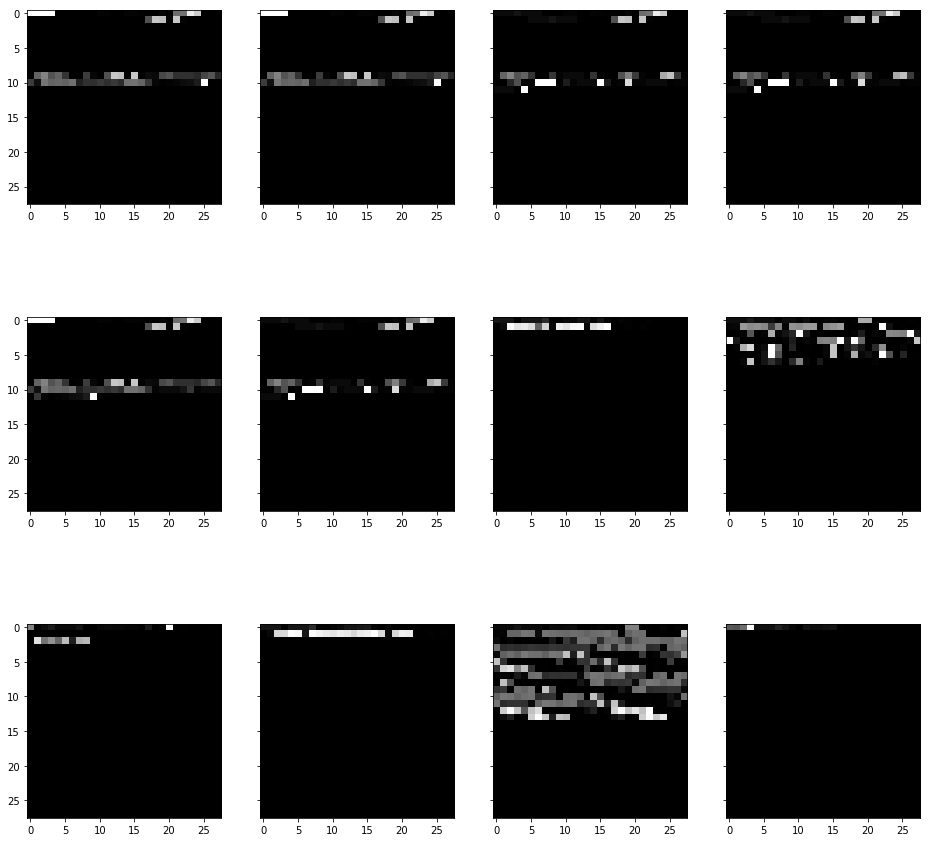



=====================WeMoInsightSwitch\Setup-A-1-STA.pcap=====================



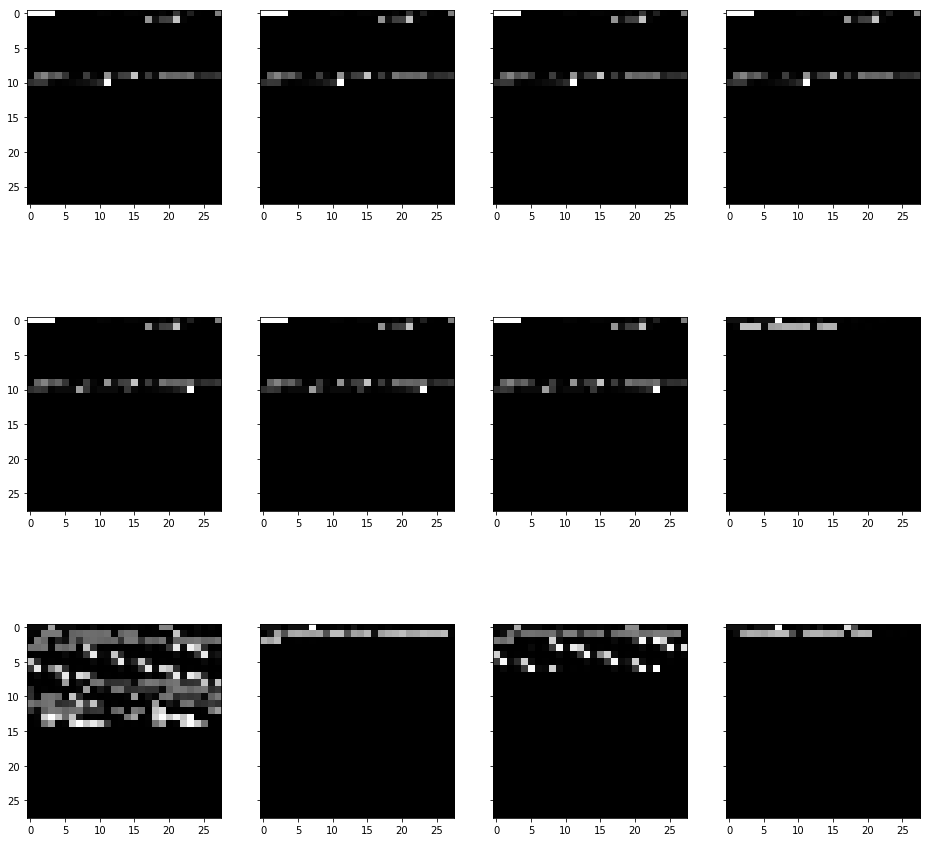



=====================WeMoLink\Setup-A-1-STA.pcap=====================



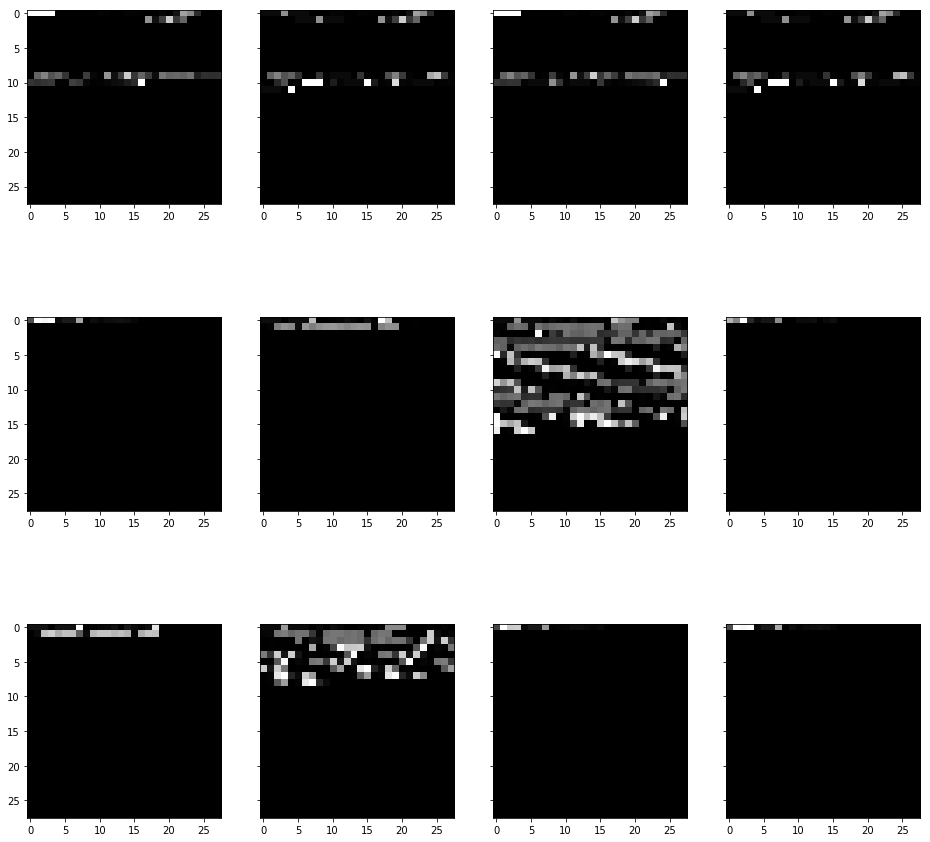



=====================WeMoSwitch\Setup-A-1-STA.pcap=====================



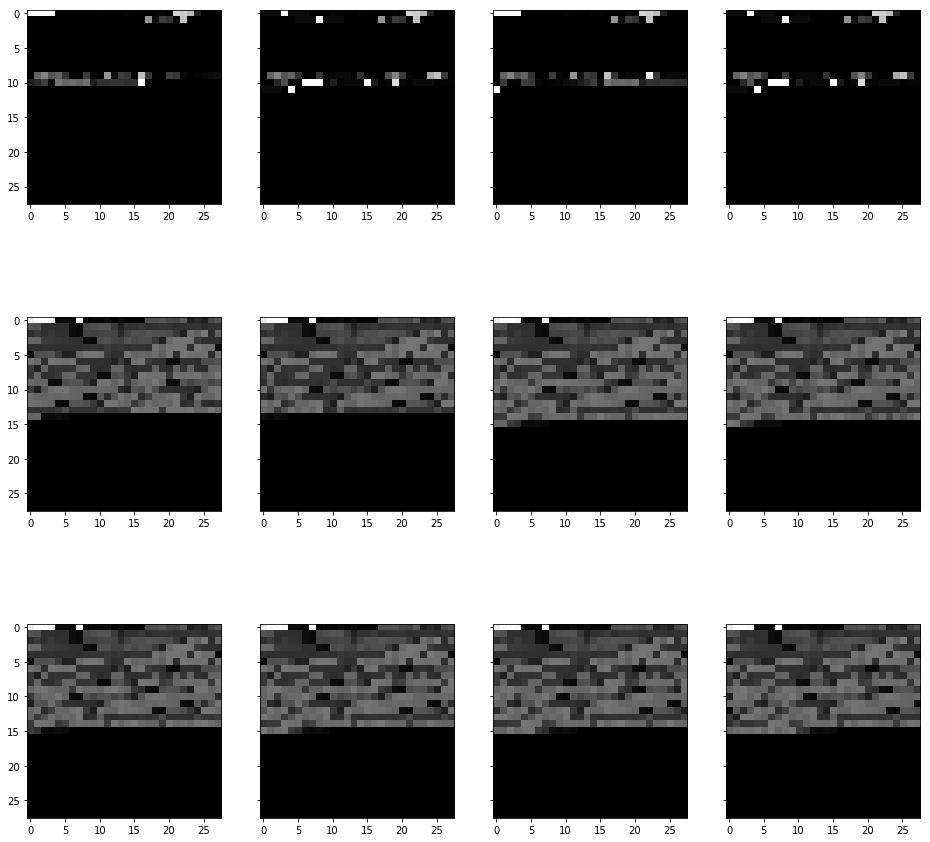



=====================Withings\Setup-A-1-STA.pcap=====================



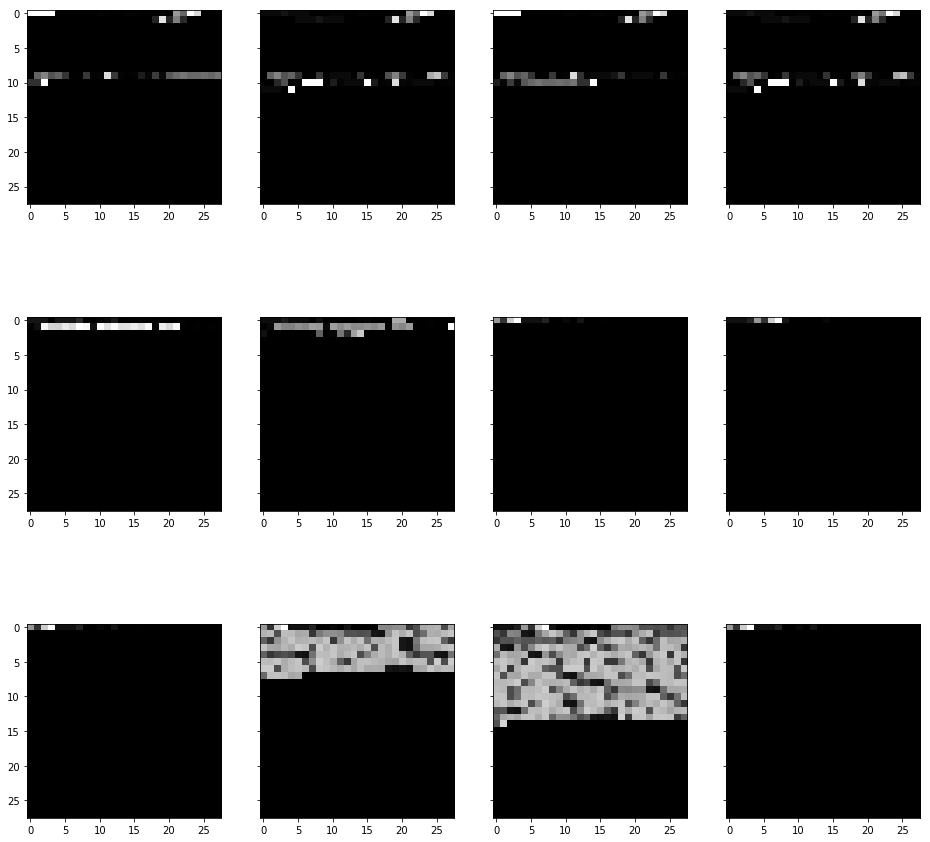

In [19]:
for i in files_add:
    payload_list=[]
    pkt = rdpcap(i)
    print("\n\n"+"====================="+ i[8:]+"====================="+"\n" )
    for j in pkt:
        listem=[]
        flag=0
        if j.haslayer(TCP):
            payload=j[TCP].payload.original
            flag=1
        elif j.haslayer(UDP):
            payload=j[UDP].payload.original
            flag=2
        if flag:
            if payload!=[]:
                temp=[]
                try:
                    temp2 =ip_parse(j[IP].dst)+ip_parse(j[IP].src)+port_parse(j[IP].dport)+port_parse(j[IP].sport)+[flag]
                except:
                    temp2 =ip_parse(j[IPv6].dst)+ip_parse(j[IPv6].src)+port_parse(j[IPv6].dport)+port_parse(j[IPv6].sport)+[flag]
                for ii in payload:
                    temp.append(ii)
                temp2=temp2+temp
                payload_list.append(temp2)              
    temp=[]        
    for ii in payload_list:
        if len(ii) > 784:
            temp.append(ii[0:784])
        else:
            temp.append(pad(ii,784))          
        
    count=0    
    try:
        fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 16), sharey=True)
        for c in range(3):
            for b in range(4): 
                A = np.array(temp[count])
                A = A.reshape(28,28)

                axes[c, b].imshow(A, cmap="gray")
                #axes[c, b].set_title(str(j[0:-4])+" - "+str(ml[temp]),fontsize=7)
                #axes[c, b].set_ylabel(("F measure"))
                count+=1 
        plt.show()
    except:pass

    